In [13]:
import pandas as pd
df = pd.read_csv('augDATA.csv')

In [14]:
df.head()

,nose_x,nose_y,nose_v,left_eye_x,left_eye_y,left_eye_v,right_eye_x,right_eye_y,right_eye_v,left_ear_x,...,right_knee_x,right_knee_y,right_knee_v,left_ankle_x,left_ankle_y,left_ankle_v,right_ankle_x,right_ankle_y,right_ankle_v,image_path
0,91,37,2,91,34,2,90,35,2,93,...,86,63,2,93,86,2,87,73,2,COCO/aug-train2017/000000528962.jpg
1,70,46,2,71,45,2,69,45,2,71,...,68,70,2,72,81,2,68,81,2,COCO/aug-train2017/000000528962.jpg
2,56,21,2,56,21,2,55,20,2,57,...,54,51,1,57,60,2,52,61,2,COCO/aug-train2017/000000528962.jpg
3,56,5,2,58,4,2,55,4,2,60,...,50,28,2,55,58,1,47,44,2,COCO/aug-train2017/000000528962.jpg
4,56,21,2,58,18,2,52,18,2,62,...,44,74,1,60,88,1,45,91,1,COCO/aug-train2017/000000528962.jpg


In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def stringToImage(string):
    img = plt.imread(string)
    return img

def plotFaces(nrows=5, ncols=5):
    selection = np.random.choice(df.index, size=(nrows*ncols), replace=False)
    image_strings = df.loc[selection]['image_path']
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for string, ax in zip(image_strings, axes.ravel()):
        ax.imshow(stringToImage(string), cmap='gray')
        ax.axis('off')

In [17]:
keypoint_cols = list(df.columns)[:-1]
xy = df.iloc[0][keypoint_cols].values.reshape((17, 3))

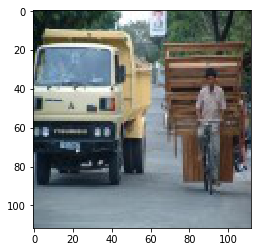

In [18]:

plt.imshow(stringToImage(df.iloc[0]['image_path']), cmap='gray')

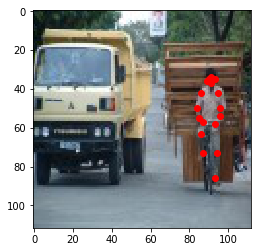

In [19]:
plt.plot(xy[:, 0], xy[:, 1], 'ro')
plt.imshow(stringToImage(df.iloc[0]['image_path']), cmap='gray')

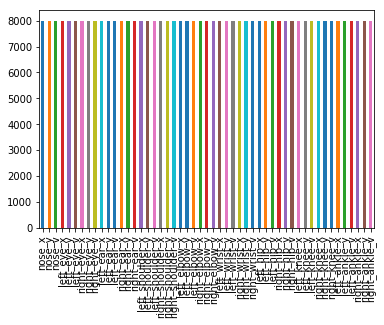

In [65]:
df.describe().loc['count'].plot.bar()

In [67]:
df.shape

(8000, 52)

In [25]:
X = np.stack([stringToImage(string) for string in df['image_path']]).astype(np.float)[:, :, :]

In [26]:
X.shape, X.dtype

((2000, 112, 112, 3), dtype('float64'))

In [31]:
Y = np.vstack(df[df.columns[:-1]].values.astype(np.float))

In [32]:
Y.shape, Y.dtype

((2000, 51), dtype('float64'))

In [33]:
x_train = X/255.

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

output_pipe = make_pipeline(
    MinMaxScaler(feature_range=(-1, 1))
)

y_train = output_pipe.fit_transform(Y)

In [55]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Activation, MaxPooling2D,Dropout, Flatten, Dense, GlobalAveragePooling2D

In [56]:
model = Sequential()
model.add(BatchNormalization(input_shape=(112, 112, 3)))
model.add(Conv2D(32, (3, 3), input_shape=(104, 104, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), input_shape=(52, 52, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(16, (3, 3), input_shape=(48, 48, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(16, (3, 3), input_shape=(20, 20, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())    

model.add(Dense(51))


array([[0.10588235, 0.17647059, 0.17647059, ..., 0.48627451, 0.5372549 ,
        0.57254902],
       [0.10588235, 0.17647059, 0.17647059, ..., 0.48627451, 0.5372549 ,
        0.57254902],
       [0.10588235, 0.17647059, 0.17647059, ..., 0.48627451, 0.5372549 ,
        0.57254902],
       ...,
       [0.10588235, 0.17647059, 0.17647059, ..., 0.48627451, 0.5372549 ,
        0.57254902],
       [0.10588235, 0.17647059, 0.17647059, ..., 0.48627451, 0.5372549 ,
        0.57254902],
       [0.10588235, 0.17647059, 0.17647059, ..., 0.48627451, 0.5372549 ,
        0.57254902]])

In [66]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
epochs = 200
history = model.fit(x_train, y_train, 
                 validation_split=0.2, shuffle=True, 
                 epochs=epochs)

Train on 1600 samples, validate on 400 samples
Epoch 1/200
1600/1600 [==============================] - 10s 6ms/step - loss: 0.1963 - accuracy: 0.2606 - val_loss: 0.1943 - val_accuracy: 0.0000e+00
Epoch 2/200
1600/1600 [==============================] - 10s 6ms/step - loss: 0.1964 - accuracy: 0.3375 - val_loss: 0.1943 - val_accuracy: 0.9925
Epoch 3/200
1600/1600 [==============================] - 10s 6ms/step - loss: 0.1962 - accuracy: 0.2894 - val_loss: 0.1940 - val_accuracy: 0.9925
Epoch 4/200
1600/1600 [==============================] - 10s 6ms/step - loss: 0.1964 - accuracy: 0.4888 - val_loss: 0.1960 - val_accuracy: 0.0000e+00
Epoch 5/200
1600/1600 [==============================] - 10s 6ms/step - loss: 0.1965 - accuracy: 0.3556 - val_loss: 0.1938 - val_accuracy: 0.0000e+00
Epoch 6/200
1600/1600 [==============================] - 10s 6ms/step - loss: 0.1963 - accuracy: 0.2894 - val_loss: 0.1939 - val_accuracy: 0.0000e+00
Epoch 7/200
1600/1600 [==============================] - 10s 

In [68]:
model.save('model.h5')

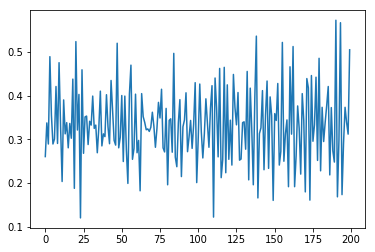

In [69]:
plt.plot(history.history['accuracy'])

In [70]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph

AttributeError: module 'tensorflow' has no attribute 'global_variables'